In [613]:
d = 2.2
c = 1/5
k = 0.98
b = 0

pricefactor = 0.45

qCournot = (d*(1+2*c))/(4*(c**2)+8*c+3)
qComp = d / (2 * (1+c))
qLeader = d * (1+2*c) / (2 * (1 + 4*c + c**2))
qFollower = (d - qLeader) / (2 * (1+c))
qCartel = d / (4 + 2*c)

qfolltest = (d * (1+6*c+2*(c**2)))/(4*(1+c)*(1+4*c+c**2))
print(qfolltest)
print("Cournot | Competition | Follower | Leader | BothLeader | Cartel")
print("Quantities:")
print(qCournot, qComp, qFollower, qLeader, qLeader, qCartel)

def profit(qSelf, qOther):
    return k * ( (d - qSelf - qOther)*qSelf - c * qSelf**2) + b

print("Profits:")
print(profit(qCournot, qCournot), profit(qComp, qComp), profit(qFollower, qLeader), profit(qLeader, qFollower), profit(qLeader, qLeader), profit(qCartel, qCartel))


0.5679347826086957
Cournot | Competition | Follower | Leader | BothLeader | Cartel
Quantities:
0.6470588235294118 0.9166666666666667 0.5679347826086958 0.8369565217391304 0.8369565217391304 0.5
Profits:
0.49237370242214545 0.16469444444444442 0.37931870274102086 0.5148647211720228 0.2942084120982989 0.539


In [614]:
def price(q1, q2):
    return d - q1 - q2


print("Prices:")
print(price(qCournot, qCournot), price(qComp, qComp), price(qFollower, qLeader), price(qLeader, qFollower), price(qLeader, qLeader), price(qCartel, qCartel))

Prices:
0.9058823529411767 0.3666666666666667 0.795108695652174 0.795108695652174 0.5260869565217394 1.2000000000000002


In [615]:
import numpy as np

values = {}
valDat = np.zeros((100, 100))
for i in range(1, 1000):
    incr = i # 1000-i
    for j in range(1, 1000):
        values[(incr, j)] = profit(incr/1000, j/1000)
        if incr %10 == 0 & j%10== 0:
            valDat[(int)(incr/10), (int)(j/10)] = profit(incr/1000, j/1000)

maxelem = max(values, key = lambda k: values[k])
minelem = min(values, key = lambda k: values[k])

print ("Max Profit : ", [x/1000 for x in maxelem], values[maxelem])
print ("Min Profit: ", [x/1000 for x in minelem], values[minelem])

Max Profit :  [0.916, 0.001] 0.9872684640000003
Min Profit:  [0.001, 0.999] 0.0011758040000000001


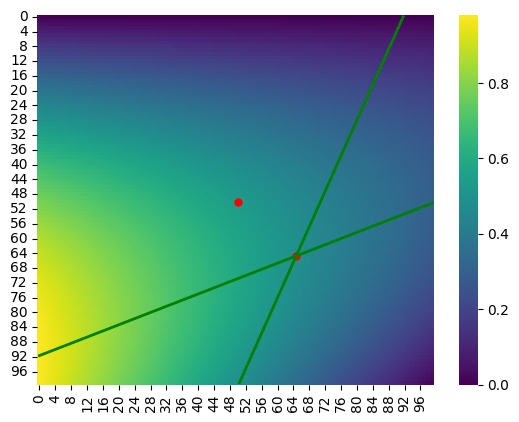

In [616]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(valDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
cour_i, cour_j = qCournot, qCournot
car_i, car_j = qCartel, qCartel  

xaxis = []
reacVal = []
for i in range(0, 100):
    xaxis.append(i+0.5)
    reacVal.append(((d - (i/100)) / (2 * (1+c)))*100 + 0.5)

plt.plot(reacVal, xaxis, color='green', linestyle='-', linewidth=2) 
plt.plot(xaxis, reacVal, color='green', linestyle='-', linewidth=2) # Adjust coordinates for the center of the cell

plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='red', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)   
plt.show()


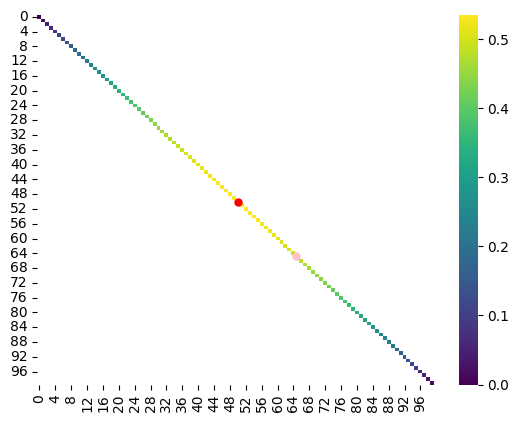

In [617]:
testValDat = valDat
for i in range(0, 100):
    for j in range(0, 100):
        if testValDat[i, j] != testValDat[j, i]:
            testValDat[i, j] = testValDat[j, i] = None

sns.heatmap(testValDat, cmap='viridis', annot=False, fmt=".2f", cbar=True)
plt.scatter(cour_i*100 + 0.5, cour_j*100 + 0.5, color='pink', marker='.', s=100)
plt.scatter(car_i*100 + 0.5, car_j*100 + 0.5, color='red', marker='.', s=100)  
plt.show()

In [618]:
prices = {}
for i in range(1, 1000):
    for j in range(1, 1000):
        prices[(i, j)] = price(i/1000, j/1000)

maxpelem = max(prices, key = lambda k: prices[k])
minpelem = min(prices, key = lambda k: prices[k])

print ("Max Price: ", [x/1000 for x in maxpelem], "Raw: ", prices[maxpelem], "Discounted: ", prices[maxpelem] * pricefactor)
print ("Min Price: ", [x/1000 for x in minpelem], "Raw: ", prices[minpelem], "Discounted: ", prices[minpelem] * pricefactor)

Max Price:  [0.001, 0.001] Raw:  2.1980000000000004 Discounted:  0.9891000000000002
Min Price:  [0.999, 0.999] Raw:  0.20200000000000007 Discounted:  0.09090000000000004


0.5347222222222222
[0, 0, 0.5347222222222222, 0.5347222222222222, 0.9060570987654321, 0.9060570987654321, 1.1639285408093278, 1.1639285408093278, 1.3430059311175886, 1.3430059311175886, 1.4673652299427697, 1.4673652299427697, 1.5537258541269234, 1.5537258541269234, 1.6136985098103636, 1.6136985098103636, 1.6553461873683082, 1.6553461873683082, 1.684268185672436, 1.684268185672436, 1.7043529067169692, 1.7043529067169692, 1.718300629664562, 1.718300629664562, 1.7279865483781678, 1.7279865483781678, 1.7347128808181722, 1.7347128808181722, 1.7393839450126194, 1.7393839450126194, 1.7426277395920966, 1.7426277395920966, 1.7448803747167339, 1.7448803747167339, 1.7464447046643983, 1.7464447046643983, 1.7475310449058319, 1.7475310449058319, 1.7482854478512722, 1.7482854478512722, 1.7488093387856054, 1.7488093387856054, 1.749173151934448, 1.749173151934448, 1.7494257999544778, 1.7494257999544778, 1.7496012499683875, 1.7496012499683875, 1.7497230902558245, 1.7497230902558245, 1.7498077015665445, 

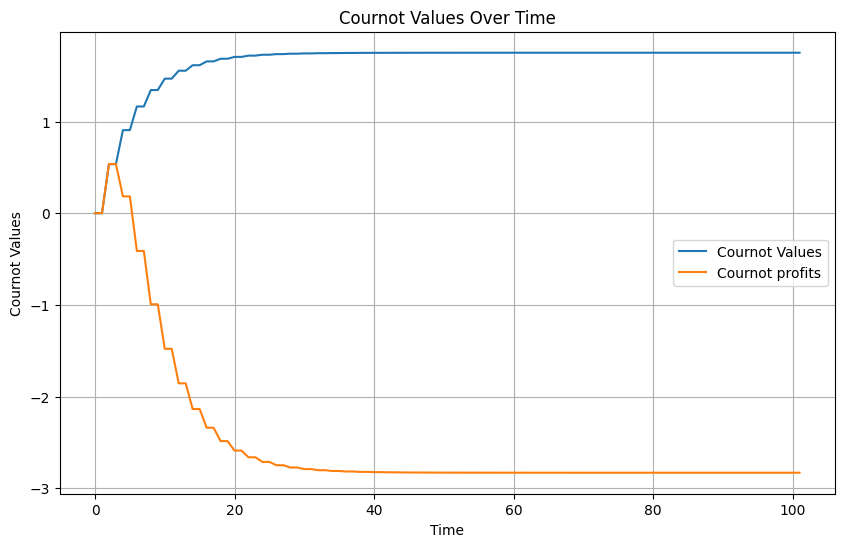

In [619]:
pastCournotValues = [0, 0]
profitsCournot = [0, 0]
const = ((1 +2*c)*d)/(4*(1+c)**2)
discount = (1/(1+c)**2)
print(const)
for i in range(0, 100):
    pastCournotValues.append((const + (pastCournotValues[i] * discount)))
    profitsCournot.append(profit(pastCournotValues[i+2], pastCournotValues[i+2]))

print(pastCournotValues)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastCournotValues)), pastCournotValues, label='Cournot Values')
plt.plot(range(len(profitsCournot)), profitsCournot, label='Cournot profits')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()


[0, 0.9166666666666667, 0.5347222222222223, 0.6938657407407408, 0.6275559413580247, 0.6551850244341565, 0.6436729064857682, 0.6484696222975966, 0.6464709907093349, 0.6473037538711106, 0.6469567692203707, 0.6471013461581789, 0.6470411057674256, 0.6470662059302394, 0.647055747529067, 0.6470601051962221, 0.6470582895015742, 0.6470590460410108, 0.6470587308162455, 0.6470588621598977, 0.6470588074333761, 0.6470588302360935, 0.6470588207349611, 0.6470588246937663, 0.6470588230442641, 0.6470588237315567, 0.6470588234451848, 0.6470588235645064, 0.6470588235147892, 0.6470588235355046, 0.6470588235268732, 0.6470588235304696, 0.6470588235289711, 0.6470588235295954, 0.6470588235293353, 0.6470588235294438, 0.6470588235293986, 0.6470588235294173, 0.6470588235294095, 0.6470588235294128, 0.6470588235294115, 0.647058823529412, 0.6470588235294117, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118, 0.6470588235294119, 0.6470588235294118

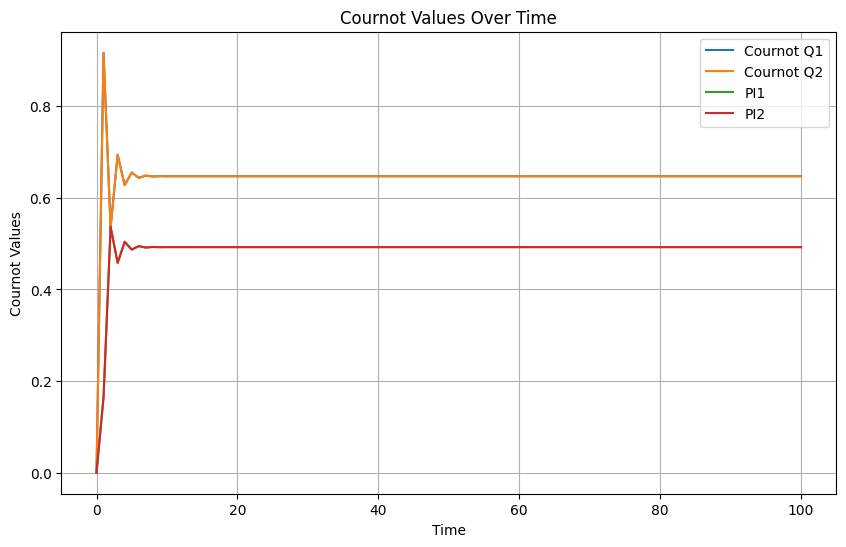

In [620]:
pastInteractiveCournotValues1 = [0]
pastInteractiveCournotValues2 = [0]
profitsInteractiveCournot1 = [0]
profitsInteractiveCournot2 = [0]
for i in range(0, 100):
    pastInteractiveCournotValues1.append((d-pastInteractiveCournotValues2[i]) / (2 *(1+c)))
    pastInteractiveCournotValues2.append((d-pastInteractiveCournotValues1[i]) / (2 *(1+c)))
    profitsInteractiveCournot1.append(profit(pastInteractiveCournotValues1[i+1], pastInteractiveCournotValues2[i+1]))
    profitsInteractiveCournot2.append(profit(pastInteractiveCournotValues2[i+1], pastInteractiveCournotValues1[i+1]))

print(pastInteractiveCournotValues1)
print(profitsInteractiveCournot1)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastInteractiveCournotValues1)), pastInteractiveCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastInteractiveCournotValues2)), pastInteractiveCournotValues2, label='Cournot Q2')
plt.plot(range(len(profitsInteractiveCournot1)), profitsInteractiveCournot1, label='PI1')
plt.plot(range(len(profitsInteractiveCournot2)), profitsInteractiveCournot2, label='PI2')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

[0, 0.5789473684210527, 0.12188365650969532, 0.48272342907129323, 0.19784992441740018, 0.42275005967047363, 0.24519732131278404, 0.38537053580569686, 0.2747074717323446, 0.3620730486323596, 0.2931002247639267, 0.34755245413374214, 0.3045638519996774, 0.3385022221055179, 0.3117087720219597, 0.33286149577213725, 0.316161977021997, 0.32934580761421295, 0.3189375203045689, 0.3271545892332352, 0.32066742955270905, 0.32578887140575613, 0.32174562783756094, 0.3249376622335045, 0.32241763507881227, 0.32440713020093764, 0.3228364761571545, 0.3240764661917202, 0.3230975266907473, 0.32387037366519966, 0.3232602313169478, 0.323741922644515, 0.3233616400174882, 0.3236618631440884, 0.32342484488624607, 0.32361196456349006, 0.3234642385025079, 0.3235808643401254, 0.32348879131042735, 0.3235614805443995, 0.323504094307053, 0.32354939923127396, 0.32351363218583645, 0.32354186932697127, 0.3235195768471279, 0.3235371761733201, 0.32352328196843155, 0.3235342510775541, 0.32352559125456265, 0.32353242795692

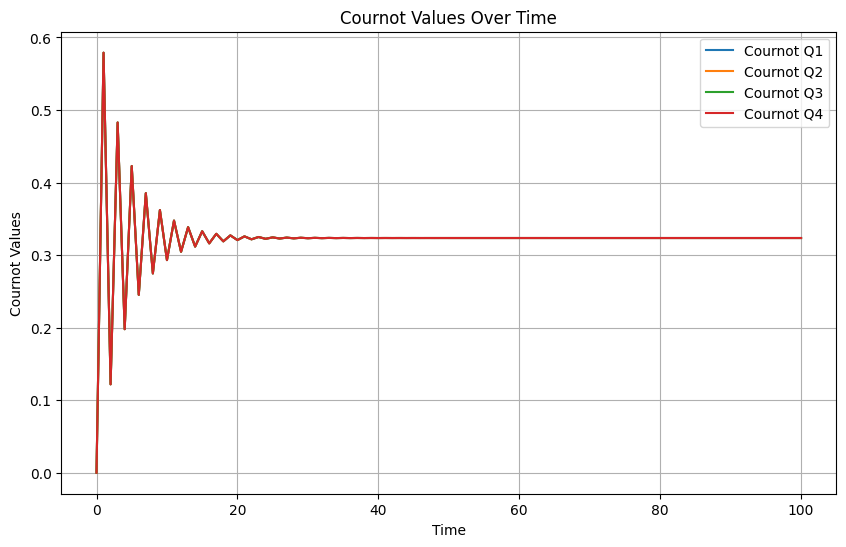

In [621]:
c = 0.9
pastItCournotValues1 = [0]
pastItCournotValues2 = [0]
pastItCournotValues3 = [0]
pastItCournotValues4 = [0]
for i in range(0, 100):
    pastItCournotValues1.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues2.append(max((d-pastItCournotValues1[i] - pastItCournotValues3[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues3.append(max((d-pastItCournotValues2[i] - pastItCournotValues1[i] - pastItCournotValues4[i]) / (2 *(1+c)), 0))
    pastItCournotValues4.append(max((d-pastItCournotValues2[i] - pastItCournotValues3[i] - pastItCournotValues1[i]) / (2 *(1+c)), 0))

print(pastItCournotValues1)
print(pastItCournotValues2)
import matplotlib.pyplot as plt

# Plot Cournot values
plt.figure(figsize=(10, 6))
plt.plot(range(len(pastItCournotValues1)), pastItCournotValues1, label='Cournot Q1')
plt.plot(range(len(pastItCournotValues2)), pastItCournotValues2, label='Cournot Q2')
plt.plot(range(len(pastItCournotValues3)), pastItCournotValues3, label='Cournot Q3')
plt.plot(range(len(pastItCournotValues4)), pastItCournotValues4, label='Cournot Q4')
plt.title('Cournot Values Over Time')
plt.xlabel('Time')
plt.ylabel('Cournot Values')
plt.grid(True)
plt.legend()
plt.show()

In [622]:
# In a 4 oligopoly

q_comp4 = (c * d) / (2 + c)
q_cournot4 = d / (5 + 2 * c)

Q_comp4 = 4 * q_comp4
p_comp4 = price(q_comp4*2, q_comp4*2)
profit_comp4 = profit(q_comp4, 3*q_comp4)

print("Comp : ", q_comp4, Q_comp4, p_comp4, profit_comp4, profit_comp4*4)

Q_cournot4 = 4 * q_cournot4
p_cournot4 = price(q_cournot4*2, q_cournot4*2)
profit_cournot4 = profit(q_cournot4, 3*q_cournot4)
print("Cournot : ", q_cournot4, Q_cournot4, p_cournot4, profit_cournot4, profit_cournot4*4)

q_cartel4 = d / (2 * (4+c))
p_cartel4 = price(q_cartel4, q_cartel4*3)
profit_cartel4 = profit(q_cartel4, 3*q_cartel4)
print("Cartel : ", q_cartel4, 4*q_cartel4, p_cartel4, profit_cartel4, profit_cartel4*4)




Comp :  0.6827586206896553 2.7310344827586213 -0.5310344827586211 -0.7664695362663501 -3.0658781450654002
Cournot :  0.3235294117647059 1.2941176470588236 0.9058823529411767 0.19489792387543253 0.7795916955017301
Cartel :  0.22448979591836735 0.8979591836734694 1.3020408163265307 0.24200000000000002 0.9680000000000001


In [623]:
profit(0.3795657, 1.746137-0.3795657)+ profit(0.4869857, 1.746137-0.4869857)+profit(0.401197, 1.746137-0.401197)+profit(0.4783882, 1.746137-0.4783882)

0.09659982489171212